# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

In [1]:
# import libraries 
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it availale and ready-to-use within python code. The package is not officially linked to the Yahoo Finance organization, but the is updated with regular commits. 

The package can be installed from here: https://pypi.org/project/yfinance/

Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html

### Get_data()

The function get_data() is created to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 

In [2]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [3]:
# create function to get hourly data from the past 5 days for the FAANG stocks. 
def get_data(tickers): 
    # yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [4]:
get_data(tickers)


[*********************100%***********************]  5 of 5 completed


**About yfinance.download()**

The download method allows to dowload market information for a or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The result is a Pandas dataframe, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a dataframe where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In [5]:
# List all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

In [6]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1,2])

df_latest_tickers.head()

Price              Close                     \
                      Ticker               AAPL               AMZN   
                    Datetime Unnamed: 1_level_2 Unnamed: 2_level_2   
0  2025-11-03 14:30:00+00:00         267.630005         255.339996   
1  2025-11-03 15:30:00+00:00         266.640015         255.460007   
2  2025-11-03 16:30:00+00:00         267.535004         256.010315   
3  2025-11-03 17:30:00+00:00         267.678009         256.510010   
4  2025-11-03 18:30:00+00:00         267.309998         255.065002   

                                                                    Dividends  \
                GOOG               META               NFLX               AAPL   
  Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
0         283.109985         648.506592        1099.681763                0.0   
1         282.940002         649.875000        1080.439941                0.0   
2         282.839996         650.169983        1089.849976                0.0   
3         282.709991         644.140015        1093.520020                0.0   
4         283.299988         644.460022        1095.800049                0.0   

                                                            ...  \
                AMZN               GOOG               META  ...   
  Unnamed: 7_level_2 Unnamed: 8_level_2 Unnamed: 9_level_2  ...   
0                0.0                0.0                0.0  ...   
1                0.0                0.0                0.0  ...   
2                0.0                0.0                0.0  ...   
3                0.0                0.0                0.0  ...   
4                0.0                0.0                0.0  ...   

         Stock Splits                                          \
                 AAPL                AMZN                GOOG   
  Unnamed: 26_level_2 Unnamed: 27_level_2 Unnamed: 28_level_2   
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

                                                       Volume  \
                 META                NFLX                AAPL   
  Unnamed: 29_level_2 Unnamed: 30_level_2 Unnamed: 31_level_2   
0                 0.0                 0.0            10223517   
1                 0.0                 0.0             3102546   
2                 0.0                 0.0             2821699   
3                 0.0                 0.0             2034109   
4                 0.0                 0.0             2075268   

                                                               \
                 AMZN                GOOG                META   
  Unnamed: 32_level_2 Unnamed: 33_level_2 Unnamed: 34_level_2   
0            26213930             4971493             6069693   
1             8062082             1577709             2263349   
2             5726412             1006362             1443661   
3             4362482              897827             2972799   
4             3903743             1014491             2232166   

                       
                 NFLX  
  Unnamed: 35_level_2  
0              989317  
1              785387  
2              595383  
3              310840  
4              261430  

[5 rows x 36 columns]

In [7]:
headers = list(df_latest_tickers)

headers


[('Price', 'Ticker', 'Datetime'),
 ('Close', 'AAPL', 'Unnamed: 1_level_2'),
 ('Close', 'AMZN', 'Unnamed: 2_level_2'),
 ('Close', 'GOOG', 'Unnamed: 3_level_2'),
 ('Close', 'META', 'Unnamed: 4_level_2'),
 ('Close', 'NFLX', 'Unnamed: 5_level_2'),
 ('Dividends', 'AAPL', 'Unnamed: 6_level_2'),
 ('Dividends', 'AMZN', 'Unnamed: 7_level_2'),
 ('Dividends', 'GOOG', 'Unnamed: 8_level_2'),
 ('Dividends', 'META', 'Unnamed: 9_level_2'),
 ('Dividends', 'NFLX', 'Unnamed: 10_level_2'),
 ('High', 'AAPL', 'Unnamed: 11_level_2'),
 ('High', 'AMZN', 'Unnamed: 12_level_2'),
 ('High', 'GOOG', 'Unnamed: 13_level_2'),
 ('High', 'META', 'Unnamed: 14_level_2'),
 ('High', 'NFLX', 'Unnamed: 15_level_2'),
 ('Low', 'AAPL', 'Unnamed: 16_level_2'),
 ('Low', 'AMZN', 'Unnamed: 17_level_2'),
 ('Low', 'GOOG', 'Unnamed: 18_level_2'),
 ('Low', 'META', 'Unnamed: 19_level_2'),
 ('Low', 'NFLX', 'Unnamed: 20_level_2'),
 ('Open', 'AAPL', 'Unnamed: 21_level_2'),
 ('Open', 'AMZN', 'Unnamed: 22_level_2'),
 ('Open', 'GOOG', 'Unnamed

In [26]:
# Create a new "Date" column to reformat datetime index to remove timezone & seconds
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers[('Price', 'Ticker', 'Datetime')].str.findall(r'\d{4}\-\d{2}\-\d{2} \d{2}:\d{2}').str[0]
# Create a Close_datetime to capture only EOD close price (at 19:30)
df_latest_tickers['Close_datetime'] = df_latest_tickers[('Price', 'Ticker', 'Datetime')].str.findall(r'\d{4}\-\d{2}\-\d{2} \d[9]:\d{2}').str[0].fillna(' ')

# show new columns
df_latest_tickers.head(5)

Price              Close                     \
                      Ticker               AAPL               AMZN   
                    Datetime Unnamed: 1_level_2 Unnamed: 2_level_2   
0  2025-11-03 14:30:00+00:00         267.630005         255.339996   
1  2025-11-03 15:30:00+00:00         266.640015         255.460007   
2  2025-11-03 16:30:00+00:00         267.535004         256.010315   
3  2025-11-03 17:30:00+00:00         267.678009         256.510010   
4  2025-11-03 18:30:00+00:00         267.309998         255.065002   

                                                                    Dividends  \
                GOOG               META               NFLX               AAPL   
  Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
0         283.109985         648.506592        1099.681763                0.0   
1         282.940002         649.875000        1080.439941                0.0   
2         282.839996         650.169983        1089.849976                0.0   
3         282.709991         644.140015        1093.520020                0.0   
4         283.299988         644.460022        1095.800049                0.0   

                                                            ...  \
                AMZN               GOOG               META  ...   
  Unnamed: 7_level_2 Unnamed: 8_level_2 Unnamed: 9_level_2  ...   
0                0.0                0.0                0.0  ...   
1                0.0                0.0                0.0  ...   
2                0.0                0.0                0.0  ...   
3                0.0                0.0                0.0  ...   
4                0.0                0.0                0.0  ...   

         Stock Splits                                          \
                 GOOG                META                NFLX   
  Unnamed: 28_level_2 Unnamed: 29_level_2 Unnamed: 30_level_2   
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

               Volume                                          \
                 AAPL                AMZN                GOOG   
  Unnamed: 31_level_2 Unnamed: 32_level_2 Unnamed: 33_level_2   
0            10223517            26213930             4971493   
1             3102546             8062082             1577709   
2             2821699             5726412             1006362   
3             2034109             4362482              897827   
4             2075268             3903743             1014491   

                                                       Date Close_datetime  
                 META                NFLX                                   
  Unnamed: 34_level_2 Unnamed: 35_level_2                                   
0             6069693              989317  2025-11-03 14:30                 
1             2263349              785387  2025-11-03 15:30                 
2             1443661              595383  2025-11-03 16:30                 
3             2972799              310840  2025-11-03 17:30                 
4             2232166              261430  2025-11-03 18:30                 

[5 rows x 38 columns]

In [63]:
# Create a subset for EOD data  (19:30) only 
eod_tickers = df_latest_tickers[df_latest_tickers['Close_datetime'] != ' ']
# remove time from "Date" to keep day only 
eod_tickers.loc[:,('Date')] = eod_tickers['Date'].replace(to_replace=' .+$', value='', regex=True)

# set datetime as index 
eod_tickers.set_index(('Price','Ticker','Datetime'), inplace=True)

eod_tickers.head(5)

Close                     \
                                        AAPL               AMZN   
                          Unnamed: 1_level_2 Unnamed: 2_level_2   
(Price, Ticker, Datetime)                                         
2025-11-03 19:30:00+00:00         267.619995         254.869995   
2025-11-04 19:30:00+00:00         270.090515         249.429993   
2025-11-05 19:30:00+00:00         269.600006         248.440002   
2025-11-06 19:30:00+00:00         271.209991         244.119995   
2025-11-07 19:30:00+00:00         267.759888         243.369995   

                                                                 \
                                        GOOG               META   
                          Unnamed: 3_level_2 Unnamed: 4_level_2   
(Price, Ticker, Datetime)                                         
2025-11-03 19:30:00+00:00         285.109985         642.369995   
2025-11-04 19:30:00+00:00         277.859985         629.520020   
2025-11-05 19:30:00+00:00         284.410004         639.085022   
2025-11-06 19:30:00+00:00         285.834991         621.400024   
2025-11-07 19:30:00+00:00         278.990997         618.349976   

                                                      Dividends  \
                                        NFLX               AAPL   
                          Unnamed: 5_level_2 Unnamed: 6_level_2   
(Price, Ticker, Datetime)                                         
2025-11-03 19:30:00+00:00        1099.250000                0.0   
2025-11-04 19:30:00+00:00        1088.310059                0.0   
2025-11-05 19:30:00+00:00        1093.959595                0.0   
2025-11-06 19:30:00+00:00        1093.079956                0.0   
2025-11-07 19:30:00+00:00        1101.390015                0.0   

                                                                 \
                                        AMZN               GOOG   
                          Unnamed: 7_level_2 Unnamed: 8_level_2   
(Price, Ticker, Datetime)                                         
2025-11-03 19:30:00+00:00                0.0                0.0   
2025-11-04 19:30:00+00:00                0.0                0.0   
2025-11-05 19:30:00+00:00                0.0                0.0   
2025-11-06 19:30:00+00:00                0.0                0.0   
2025-11-07 19:30:00+00:00                0.0                0.0   

                                                                  ...  \
                                        META                NFLX  ...   
                          Unnamed: 9_level_2 Unnamed: 10_level_2  ...   
(Price, Ticker, Datetime)                                         ...   
2025-11-03 19:30:00+00:00                0.0                 0.0  ...   
2025-11-04 19:30:00+00:00                0.0                 0.0  ...   
2025-11-05 19:30:00+00:00                0.0                 0.0  ...   
2025-11-06 19:30:00+00:00                0.0                 0.0  ...   
2025-11-07 19:30:00+00:00                0.0                 0.0  ...   

                                 Stock Splits                      \
                                         GOOG                META   
                          Unnamed: 28_level_2 Unnamed: 29_level_2   
(Price, Ticker, Datetime)                                           
2025-11-03 19:30:00+00:00                 0.0                 0.0   
2025-11-04 19:30:00+00:00                 0.0                 0.0   
2025-11-05 19:30:00+00:00                 0.0                 0.0   
2025-11-06 19:30:00+00:00                 0.0                 0.0   
2025-11-07 19:30:00+00:00                 0.0                 0.0   

                                                           Volume  \
                                         NFLX                AAPL   
                          Unnamed: 30_level_2 Unnamed: 31_level_2   
(Price, Ticker, Datetime)                                           
2025-11-03 19:30:00+00:00                 0.0             2243434  

Text(0.5, 1.0, 'FAANG Stocks - Close price over last 5 days')

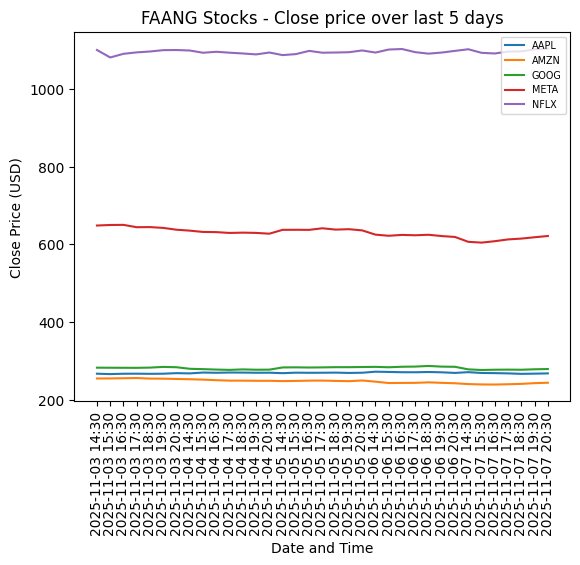

In [64]:
# Plot hourly close price 

# get subset for closing prices 
close_price = df_latest_tickers['Close']
# get index (date and time)
date = df_latest_tickers['Date']

fig, ax = plt.subplots()
ax.plot(date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(date, labels = date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')


Text(0.5, 1.0, 'FAANG Stocks - Close price over last 5 days')

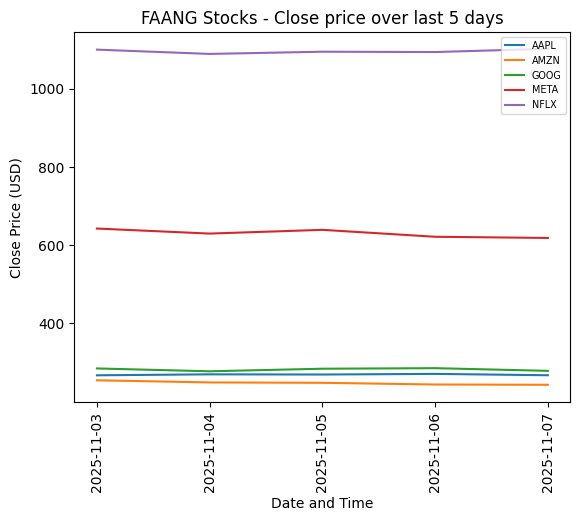

In [65]:
# [REMOVE]
# Plot EOD close price 

# get subset for closing prices 
close_price = eod_tickers['Close']
# get index (date and time)
eod_date = eod_tickers['Date']

fig, ax = plt.subplots()
ax.plot(eod_date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')

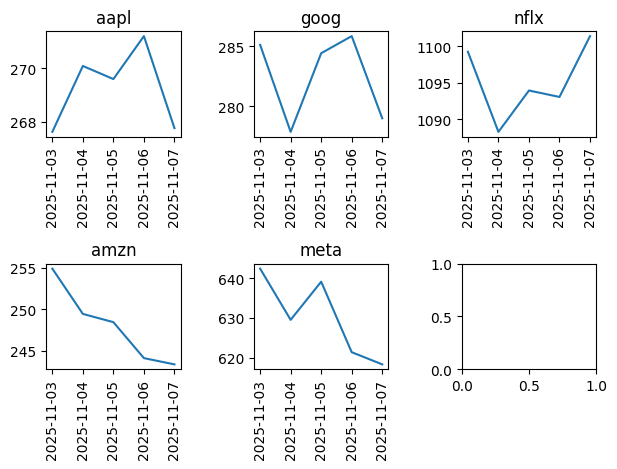

In [70]:
# Plot EOD close price in separate plots 
# Display the data in separate plots https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 

# create arrays for variables 
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(eod_date, aapl)
axs[0, 0].set_title("aapl")
axs[0, 0].set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 
axs[1, 0].plot(eod_date, amzn)
axs[1, 0].set_title("amzn")
axs[1, 0].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(eod_date, goog)
axs[0, 1].set_title("goog")
axs[0, 1].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')
axs[1, 1].plot(eod_date, meta)
axs[1, 1].set_title("meta")
axs[1, 1].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')
axs[0, 2].plot(eod_date, nflx)
axs[0, 2].set_title("nflx")
axs[0, 2].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')

fig.tight_layout()


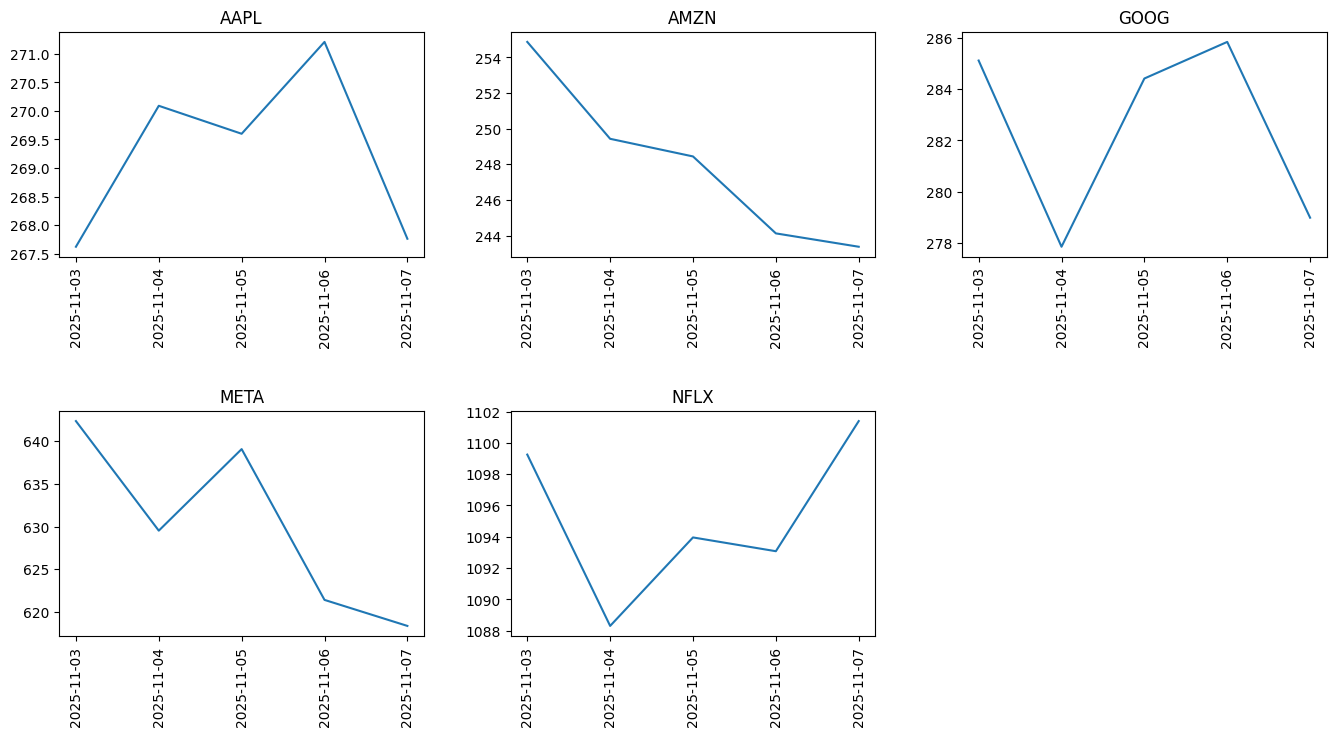

In [81]:
# See: https://chatgpt.com/share/6910e526-a2d0-800f-be66-94ac6a06bf9c 
# To add: percentage variation in value at EOD close price

# Create arrays for variables
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

# Put data and titles in lists for easy looping
data = [aapl, amzn, goog, meta, nflx]
titles = ["AAPL", "AMZN", "GOOG", "META", "NFLX"]

# Create subplots: 2 rows, 3 columns, but we'll hide the last (empty) one
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Flatten the 2D array of axes for easy iteration
axs = axs.flatten()

# Plot each stock
for i, (ax, series, title) in enumerate(zip(axs, data, titles)):
    ax.plot(eod_date, series,)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=90)

# Hide the last unused subplot (the 6th one)
axs[-1].set_visible(False)

# Adjust spacing between plots
fig.tight_layout(pad=3.0)

plt.show()